# Distributions Warmup

It's another day at the office at Big Research Co &trade;. You look up from your
laptop and see a woman in a lab coat standing in front of your desk.

"I need some help" she says. "We lost some subjects from the trial."

She notices a curious look on your face.

"Not like that, they just ran away. We didn't lock the doors soon enough."

"Anyway, there's probably like a 70%, no maybe 80%, no, let's say 90% chance
that a given subject will stick around, and I need to run the study again with
10, or 20 subjects. We need to gather enough data on them to justify the cost,
so I need you to figure out what are the probabilities are that at least half of
them stick around, only 1 person leaves, and that all the subjects stay."

She sees you start to form another question and cuts you off.

"Don't ask. You *really* don't want to know."

---

- What probability distribution would you use to model the scenario outlined
  above?
- Calculate all the requested probabilities. Use all the possible combinations
  of subject count and chance that a subject will stay in the study.
- **Bonus**: visualize the requested probabilities.

## Hints

- Use `scipy.stats` for this.
- A fancy list comprehension or the `itertools` module can help you find
  all the possible combinations.
- Consider storing the results of your calculations in a data frame.

In [2]:
import itertools as it
from scipy import stats
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

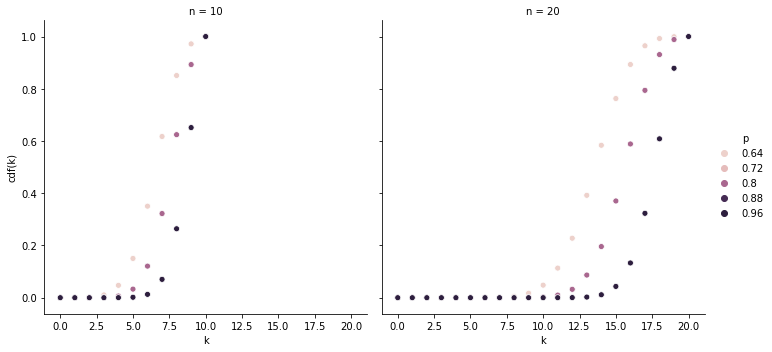

In [16]:
ps = [.7, .8, .9]
ns = [10, 20]
ks = range(21)

cdfs = [(p, n, k, stats.binom(n, p).cdf(k)) for p, n, k in it.product(ps, ns, ks)]
df = pd.DataFrame(cdfs, columns=['p', 'n', 'k', 'cdf(k)'])
df.loc[(df.n == 10) & (df.k > 10), 'cdf(k)'] = np.nan
df = df.dropna()

sns.relplot(data=df, x='k', y='cdf(k)', col='n', hue='p')

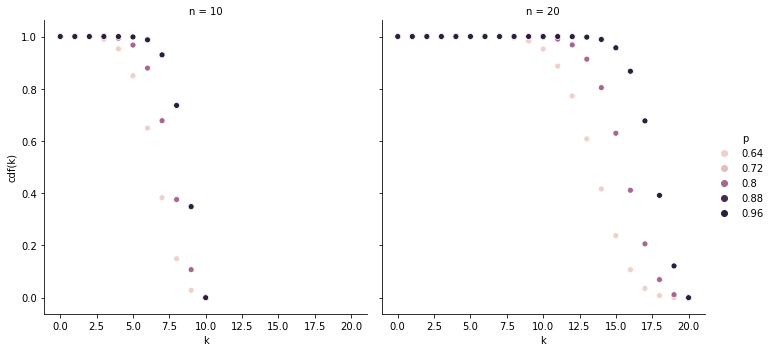

In [17]:
ps = [.7, .8, .9]
ns = [10, 20]
ks = range(21)

cdfs = [(p, n, k, stats.binom(n, p).sf(k)) for p, n, k in it.product(ps, ns, ks)]
df = pd.DataFrame(cdfs, columns=['p', 'n', 'k', 'cdf(k)'])
df.loc[(df.n == 10) & (df.k > 10), 'cdf(k)'] = np.nan
df = df.dropna()

sns.relplot(data=df, x='k', y='cdf(k)', col='n', hue='p')

In [19]:
# success == a subject sticking around
ps = [.7, .8, .9]
ns = [10, 20]

for p in ps:
    for n in ns:
        # calculate the probability that:
        # least half of them stick around, only 1 person leaves, and that all the subjects stay.
        p_at_least_half = stats.binom(n, p).sf((n / 2) - 1)
        p_one_leaves = stats.binom(n, p).pmf(n - 1)
        p_all_stay = stats.binom(n, p).pmf(n)
        
        print(f'''---
        n = {n}, p = {p}
        P(at least half stay) = {p_at_least_half:.4f}
        P(one subject leaves) = {p_one_leaves:4f}
        P(all the subjects stay) = {p_all_stay:4f}
        ''')

---
        n = 10, p = 0.7
        P(at least half stay) = 0.9527
        P(one subject leaves) = 0.121061
        P(all the subjects stay) = 0.028248
        
---
        n = 20, p = 0.7
        P(at least half stay) = 0.9829
        P(one subject leaves) = 0.006839
        P(all the subjects stay) = 0.000798
        
---
        n = 10, p = 0.8
        P(at least half stay) = 0.9936
        P(one subject leaves) = 0.268435
        P(all the subjects stay) = 0.107374
        
---
        n = 20, p = 0.8
        P(at least half stay) = 0.9994
        P(one subject leaves) = 0.057646
        P(all the subjects stay) = 0.011529
        
---
        n = 10, p = 0.9
        P(at least half stay) = 0.9999
        P(one subject leaves) = 0.387420
        P(all the subjects stay) = 0.348678
        
---
        n = 20, p = 0.9
        P(at least half stay) = 1.0000
        P(one subject leaves) = 0.270170
        P(all the subjects stay) = 0.121577
        
